In [1]:
%matplotlib inline

# Tarea 6: Reducción de Dimensiones: caso de insuficiencia cardiaca 

Tecnológico de Costa Rica<br/>
Aprendizaje Automático <br/>


Cuaderno base para realizar la tarea 6, en la que se usará la reducción de dimensiones para visualizar la estructura de datos en espacios de muchas dimensiones.


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from sklearn.preprocessing import OneHotEncoder

## Cargar datos de insuficiencia cardiaca

Los datos quedarán almacenados en X y las etiquetas en y

Los datos originales tienen varias columnas categóricas, que requieren ser 
codificadas one-hot para que tenga sentido.

Cargamos entonces primero los datos crudos, convirtiendo esas columnas a números,
y posteriormente 

In [3]:
archivo_csv = 'heart.csv' 

## Es necesario manejar manualmente la conversión de varias columnas categóricas
converters={}
for i in range(12):
    converters[i] = lambda x : float(x)
    
converters[1] =  lambda x : 1.0 if (x==b'F') else 0.0

# TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic
pain_types={b'TA':0.0,b'ATA':1.0,b'NAP':2.0,b'ASY':3.0}
converters[2] = lambda x : pain_types[x]

# RestingECG: resting electrocardiogram results 
#  Normal: Normal, 
#  ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV),
#  LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria
restingECG_types={b'Normal':0.0,b'ST':1.0,b'LVH':2.0}
converters[6] = lambda x : restingECG_types[x]

converters[8] =  lambda x : 1.0 if (x==b'Y') else 0.0

stslope_type = {b'Up':1.0,b'Flat':0.0,b'Down':-1.0}
converters[10] = lambda x : stslope_type[x]

# Carguemos los datos
data = np.genfromtxt(archivo_csv, delimiter=',',skip_header=1,converters=converters)

# Necesitamos recodificar dos columnas y luego armar la matriz de datos a pedazos
enc = OneHotEncoder()
cp=enc.fit_transform(data[:,2].reshape(-1,1)).toarray() # chest pain 
re=enc.fit_transform(data[:,6].reshape(-1,1)).toarray() # resting ECG

print("Datos completos en matriz {0} x {1}".format(data.shape[0],data.shape[1]))

Datos completos en matriz 918 x 12


In [4]:
# La última columna tiene las etiquetas
y=data[:,11].ravel()
print("Label shape:",y.shape)

# La columna col_grupos tiene los grupos
X=np.column_stack((data[:,0:2],cp,data[:,3:6],re,data[:,7:11]))
print("Data shape :",X.shape)

Label shape: (918,)
Data shape : (918, 16)


## Normalización de los datos

In [5]:

import pickle

metodonormalizar = 2

# *************************************************************
if metodonormalizar == 1:

  from sklearn.preprocessing import StandardScaler

  # Normalizar los datos de entrenamiento
  scaler = StandardScaler()
  X_norm = scaler.fit_transform(X)

elif metodonormalizar == 2:

  from sklearn.preprocessing import MinMaxScaler

  # Normalizar los datos de entrenamiento
  scaler = MinMaxScaler()
  X_norm = scaler.fit_transform(X)

pickle.dump(scaler, open('Normalizadores/heart.pkl', 'wb'))

## Métodos de reducción de dimensiones:

### PCA

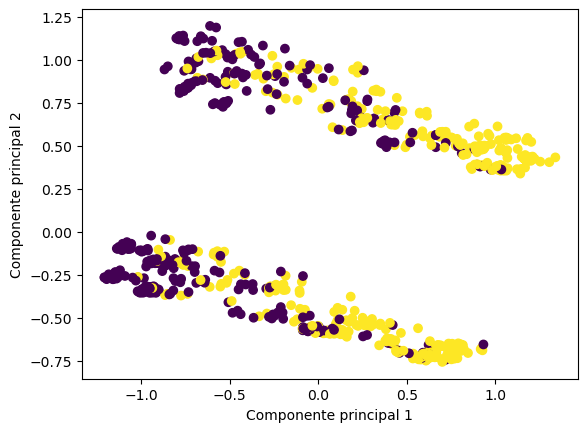

Componentes principales:
[[ 0.09009107 -0.19214967 -0.03382854 -0.31080355 -0.2537878   0.59841989
   0.01890487 -0.04220131  0.16266    -0.23511056  0.16824272  0.06686784
  -0.1181162   0.49521105  0.07463062 -0.2308649 ]
 [ 0.05618197  0.07728981  0.0454898   0.00545711  0.1724097  -0.22335661
   0.01316473  0.02643737  0.05304788 -0.76439493  0.32314212  0.44125281
   0.04021383 -0.13991186 -0.00188703  0.02916591]]
Proporción de varianza explicada:
[0.25296559 0.17885373]


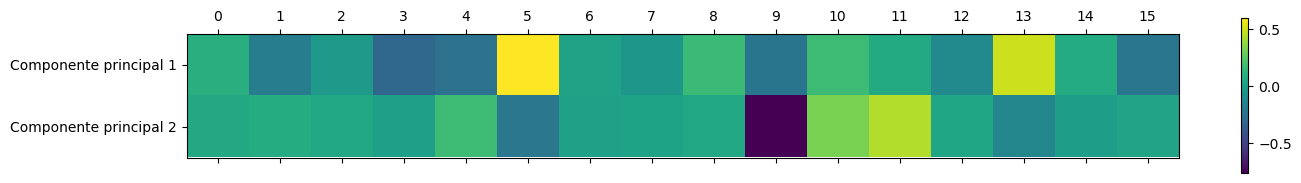

In [6]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_norm)

# Visualizar los datos proyectados
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y)
plt.xlabel('Componente principal 1')
plt.ylabel('Componente principal 2')
plt.show()
#Punto 4

print('Componentes principales:')
print(pca.components_)

print('Proporción de varianza explicada:')
print(pca.explained_variance_ratio_)

# Visualizar la importancia de cada característica
plt.matshow(pca.components_, cmap='viridis')
plt.yticks([0, 1], ['Componente principal 1', 'Componente principal 2'])
plt.colorbar()
plt.xticks(range(X.shape[1]))
plt.show()


### KPCA Y SVD

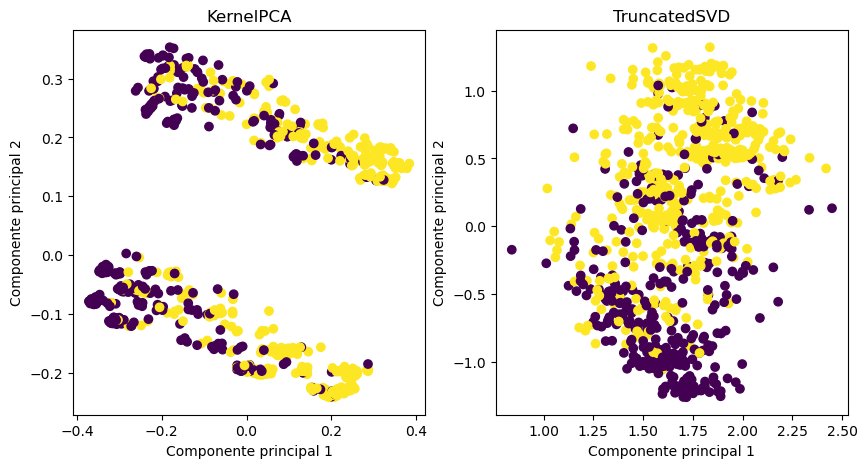

In [7]:
#Otros metodos
from sklearn.decomposition import KernelPCA, TruncatedSVD


kpca = KernelPCA(n_components=2, kernel='rbf')
X_kpca = kpca.fit_transform(X_norm)

svd = TruncatedSVD(n_components=2)
X_svd = svd.fit_transform(X_norm)

# Visualizar los datos proyectados
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

ax1.scatter(X_kpca[:, 0], X_kpca[:, 1], c=y)
ax1.set_xlabel('Componente principal 1')
ax1.set_ylabel('Componente principal 2')
ax1.set_title('KernelPCA')

ax2.scatter(X_svd[:, 0], X_svd[:, 1], c=y)
ax2.set_xlabel('Componente principal 1')
ax2.set_ylabel('Componente principal 2')
ax2.set_title('TruncatedSVD')

plt.show()


### Análisis discriminante

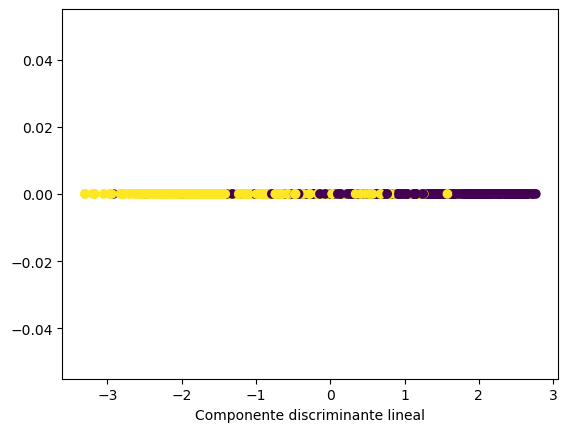

In [8]:
#Discriminacion
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis


lda = LinearDiscriminantAnalysis(n_components=1)
X_lda = lda.fit_transform(X_norm, y)
# Visualizar los datos proyectados
plt.scatter(X_lda[:, 0], np.zeros_like(X_lda[:, 0]), c=y)
plt.xlabel('Componente discriminante lineal')
plt.show()


### UMAP

C:\Users\Kley2\anaconda3\envs\tarea6\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


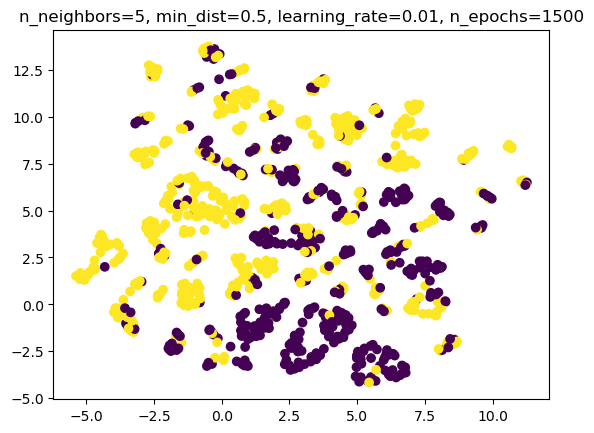

In [9]:
#UMAP
import umap
import itertools

#  /// 3*3*3*3 = 81 gráficos ///
#n_neighbors_values = [5, 10, 15]
#min_dist_values = [0.1, 0.3, 0.5]
#learning_rate_values = [0.1, 0.01, 0.001]
#n_epochs_values = [500, 1000, 1500]

#  /// 2*2*2*2 = 16 gráficos ///
#n_neighbors_values = [5, 15]
#min_dist_values = [0.1, 0.5]
#learning_rate_values = [0.1, 0.001]
#n_epochs_values = [500, 1500]

#  /// Selección ///
n_neighbors_values = [5]
min_dist_values = [0.5]
learning_rate_values = [0.01]
n_epochs_values = [1500]

# Generar todas las combinaciones posibles de valores
parameter_combinations = itertools.product(n_neighbors_values, min_dist_values, learning_rate_values, n_epochs_values)

for combination in parameter_combinations:
    # Extraer los valores de los parámetros
    n_neighbors, min_dist, learning_rate, n_epochs = combination
    
    # Crear y ajustar el modelo UMAP con los valores de los parámetros
    reducer = umap.UMAP(n_neighbors=n_neighbors, min_dist=min_dist, learning_rate=learning_rate, n_epochs=n_epochs)
    umap_result = reducer.fit_transform(X_norm)
    
    # Visualizar los resultados con scatter
    plt.figure()
    plt.scatter(umap_result[:, 0], umap_result[:, 1], c=y)
    plt.title(f"n_neighbors={n_neighbors}, min_dist={min_dist}, learning_rate={learning_rate}, n_epochs={n_epochs}")
    plt.show()


### PaCMAP

<Figure size 640x480 with 0 Axes>

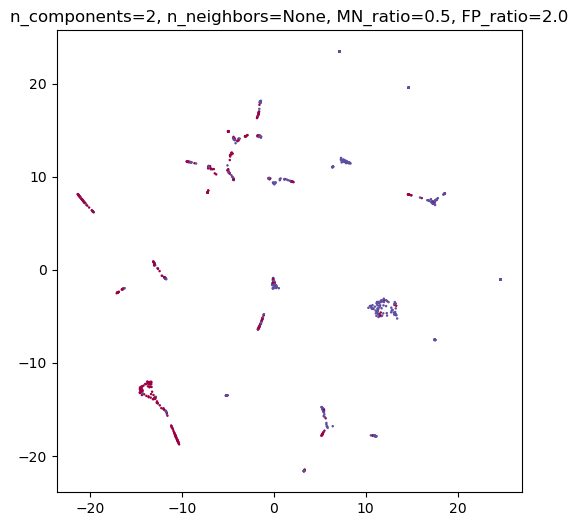

<Figure size 640x480 with 0 Axes>

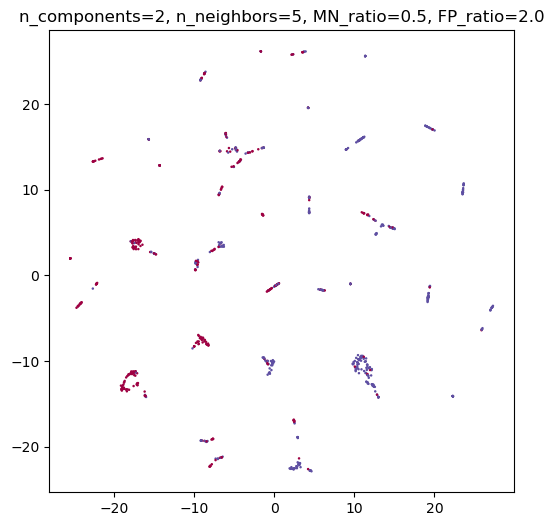

In [10]:

import pacmap

#  /// 2*2*2*2 = 16 gráficos ///

# Se pueden agregar varios valores como en el UMAP

#  /// Selección ///
n_components_values = [2]
n_neighbors_values = [None, 5]
MN_ratio_values = [0.5]
FP_ratio_values = [2.0]

parameter_comb_pacmap = itertools.product(n_components_values, n_neighbors_values, MN_ratio_values, FP_ratio_values)


for combination in parameter_comb_pacmap:
    
    n_components, n_neighbors, MN_ratio, FP_ratio = combination
    
    # initializing the pacmap instance
    # Setting n_neighbors to "None" leads to a default choice shown below in "parameter" section
    reducer_pac = pacmap.PaCMAP(n_components=n_components, n_neighbors=n_neighbors, MN_ratio=MN_ratio, FP_ratio=FP_ratio) 

    # fit the data (The index of transformed data corresponds to the index of the original data)
    X_transformed = reducer_pac.fit_transform(X_norm, init="pca")

    plt.figure()
    fig, ax = plt.subplots(1, 1, figsize=(6, 6))
    ax.scatter(X_transformed[:, 0], X_transformed[:, 1], cmap="Spectral", c=y, s=0.6)
    plt.title(f"n_components={n_components}, n_neighbors={n_neighbors}, MN_ratio={MN_ratio}, FP_ratio={FP_ratio}")
    plt.show()


#  Aglomeración 

## Cluster PCA


C:\Users\Kley2\anaconda3\envs\tarea6\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Kley2\anaconda3\envs\tarea6\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


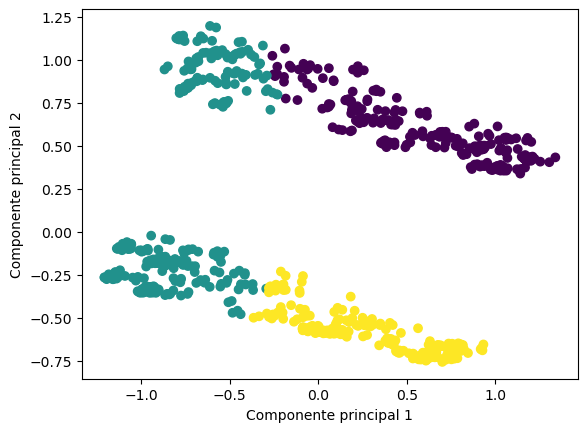

In [11]:
from sklearn.cluster import KMeans
k=3

kmeans = KMeans(n_clusters=k) # k es el número de clústers estimado en el paso anterior
kmeans.fit(X_pca)

# Obtener las etiquetas de clúster para cada punto de datos
cluster_labels = kmeans.predict(X_pca)

# Visualizar los clústers encontrados
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels)
plt.xlabel('Componente principal 1')
plt.ylabel('Componente principal 2')
plt.show()

# Cluster KPCA

C:\Users\Kley2\anaconda3\envs\tarea6\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Kley2\anaconda3\envs\tarea6\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


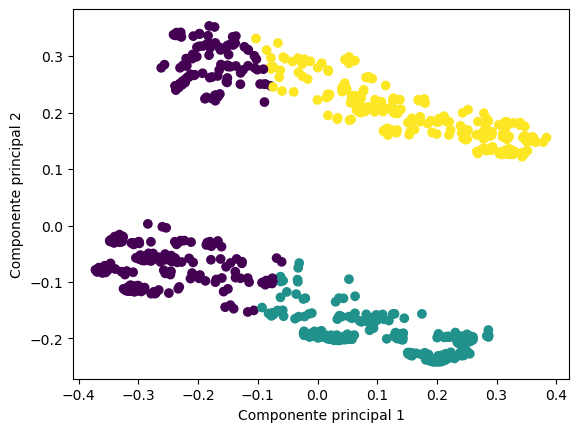

In [12]:
# Visualizar los clústers encontrados
kmeans = KMeans(n_clusters=k) # k es el número de clústers estimado en el paso anterior
kmeans.fit(X_kpca)

# Obtener las etiquetas de clúster para cada punto de datos
cluster_labels = kmeans.predict(X_kpca)


plt.scatter(X_kpca[:, 0], X_kpca[:, 1], c=cluster_labels)
plt.xlabel('Componente principal 1')
plt.ylabel('Componente principal 2')
plt.show()

# Cluster SVD

C:\Users\Kley2\anaconda3\envs\tarea6\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Kley2\anaconda3\envs\tarea6\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


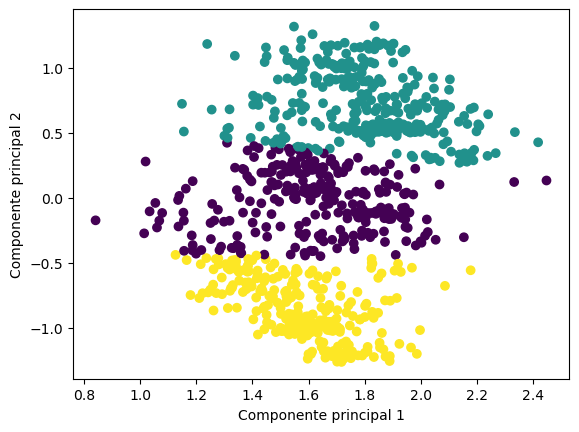

In [13]:
# Visualizar los clústers encontrados
kmeans = KMeans(n_clusters=k) # k es el número de clústers estimado en el paso anterior
kmeans.fit(X_svd)

# Obtener las etiquetas de clúster para cada punto de datos
cluster_labels = kmeans.predict(X_svd)

# Visualizar los clústers encontrados
plt.scatter(X_svd[:, 0], X_svd[:, 1], c=cluster_labels)
plt.xlabel('Componente principal 1')
plt.ylabel('Componente principal 2')
plt.show()

# Cluster LDA

C:\Users\Kley2\anaconda3\envs\tarea6\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Kley2\anaconda3\envs\tarea6\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


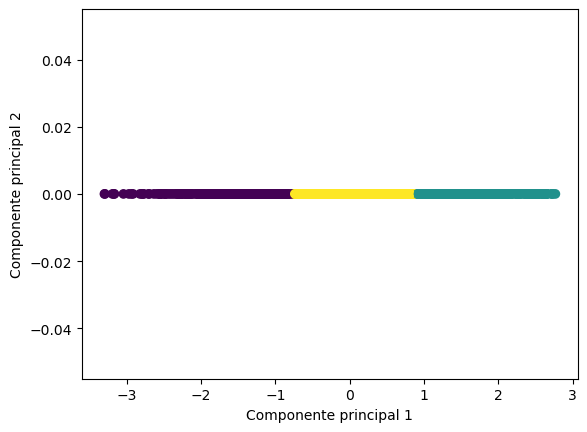

In [14]:
# Visualizar los clústers encontrados
kmeans = KMeans(n_clusters=k) # k es el número de clústers estimado en el paso anterior
kmeans.fit(X_lda)

# Obtener las etiquetas de clúster para cada punto de datos
cluster_labels = kmeans.predict(X_lda)

# Visualizar los clústers encontrados
plt.scatter(X_lda[:, 0], np.zeros_like(X_lda[:, 0]), c=cluster_labels)
plt.xlabel('Componente principal 1')
plt.ylabel('Componente principal 2')
plt.show()

# Cluster UMAP

C:\Users\Kley2\anaconda3\envs\tarea6\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Kley2\anaconda3\envs\tarea6\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


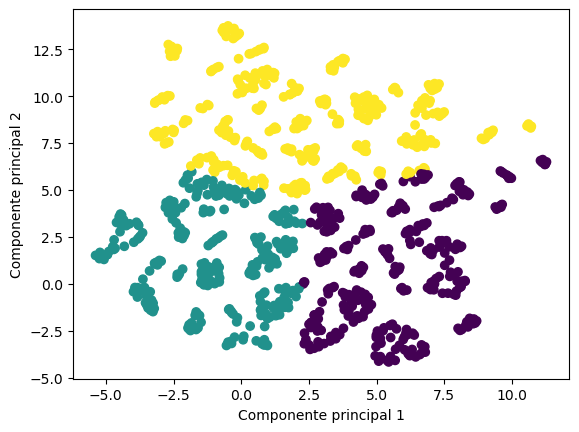

In [15]:
# Visualizar los clústers encontrados
kmeans = KMeans(n_clusters=k) # k es el número de clústers estimado en el paso anterior
kmeans.fit(umap_result)

# Obtener las etiquetas de clúster para cada punto de datos
cluster_labels = kmeans.predict(umap_result)

# Visualizar los clústers encontrados
plt.scatter(umap_result[:, 0], umap_result[:, 1], c=cluster_labels)
plt.xlabel('Componente principal 1')
plt.ylabel('Componente principal 2')
plt.show()

# Cluster PaCMAP

C:\Users\Kley2\anaconda3\envs\tarea6\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Kley2\anaconda3\envs\tarea6\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


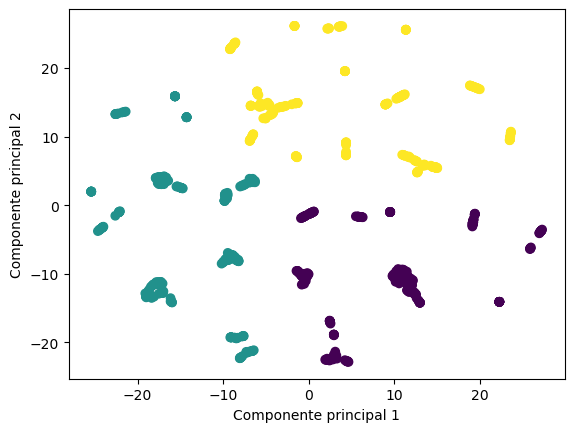

In [16]:
# Visualizar los clústers encontrados
kmeans = KMeans(n_clusters=k) # k es el número de clústers estimado en el paso anterior
kmeans.fit(X_transformed)

# Obtener las etiquetas de clúster para cada punto de datos
cluster_labels = kmeans.predict(X_transformed)

# Visualizar los clústers encontrados
plt.scatter(X_transformed[:, 0], X_transformed[:, 1], c=cluster_labels)
plt.xlabel('Componente principal 1')
plt.ylabel('Componente principal 2')
plt.show()

In [17]:
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

# Split data into training, validation and test sets
X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.2)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25)

# Define number of components for GaussianMixture
n_components = 2


def gmm_bic_score(estimator, X):
    """Callable to pass to GridSearchCV that will use the BIC score."""
    # Make it negative since GridSearchCV expects a score to maximize
    return -estimator.bic(X)


param_grid = {
    "n_components": range(1, 7),
    "covariance_type": ["spherical", "tied"]
}


grid_search_benigno = GridSearchCV(
    GaussianMixture(), param_grid=param_grid, scoring=gmm_bic_score
)
grid_search_maligno = GridSearchCV(
    GaussianMixture(), param_grid=param_grid, scoring=gmm_bic_score
)


grid_search_benigno.fit(X_train[y_train == 0])
grid_search_maligno.fit(X_train[y_train == 1])


# Predict probabilities on validation set
prob_class_0 = grid_search_benigno.score_samples(X_val)
prob_class_1 = grid_search_maligno.score_samples(X_val)


y_pred = (prob_class_1 > prob_class_0).astype(int)


accuracy = (y_pred == y_val).mean()
print(f'Validation accuracy: {accuracy:.2f}')
#Profe ignore los warnings todo esta bien :D (esperemos)
#Entre todos ellos esta la "Validation acuracy:0.66" 

C:\Users\Kley2\anaconda3\envs\tarea6\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Kley2\anaconda3\envs\tarea6\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Kley2\anaconda3\envs\tarea6\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Kley2\anaconda3\envs\tarea6\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

C:\Users\Kley2\anaconda3\envs\tarea6\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Kley2\anaconda3\envs\tarea6\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Kley2\anaconda3\envs\tarea6\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Kley2\anaconda3\envs\tarea6\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

C:\Users\Kley2\anaconda3\envs\tarea6\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Kley2\anaconda3\envs\tarea6\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Kley2\anaconda3\envs\tarea6\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Kley2\anaconda3\envs\tarea6\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

C:\Users\Kley2\anaconda3\envs\tarea6\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Kley2\anaconda3\envs\tarea6\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Kley2\anaconda3\envs\tarea6\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Kley2\anaconda3\envs\tarea6\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

C:\Users\Kley2\anaconda3\envs\tarea6\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Kley2\anaconda3\envs\tarea6\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Kley2\anaconda3\envs\tarea6\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Kley2\anaconda3\envs\tarea6\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

Validation accuracy: 0.78


C:\Users\Kley2\anaconda3\envs\tarea6\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Kley2\anaconda3\envs\tarea6\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


In [18]:
import pandas as pd

df = pd.DataFrame(grid_search_maligno.cv_results_)[
    ["param_n_components", "param_covariance_type", "mean_test_score"]
]
df["mean_test_score"] = -df["mean_test_score"]
df = df.rename(
    columns={
        "param_n_components": "Number of components",
        "param_covariance_type": "Type of covariance",
        "mean_test_score": "BIC score",
    }
)
df.sort_values(by="BIC score").head()

,Number of components,Type of covariance,BIC score
11,6,tied,-1971.474153
9,4,tied,-1481.456990
10,5,tied,-1417.655725
8,3,tied,-1390.536910
7,2,tied,-1263.296119


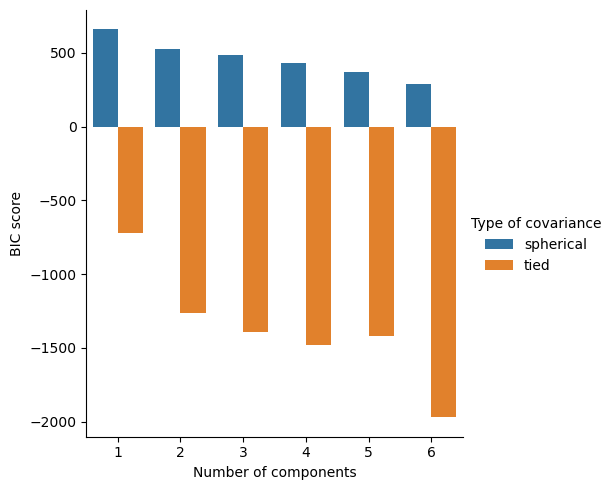

In [19]:
import seaborn as sns

sns.catplot(
    data=df,
    kind="bar",
    x="Number of components",
    y="BIC score",
    hue="Type of covariance",
)
plt.show()

In [20]:
import pandas as pd

df2 = pd.DataFrame(grid_search_maligno.cv_results_)[
    ["param_n_components", "param_covariance_type", "mean_test_score"]
]
df2["mean_test_score"] = -df2["mean_test_score"]
df2 = df2.rename(
    columns={
        "param_n_components": "Number of components",
        "param_covariance_type": "Type of covariance",
        "mean_test_score": "BIC score",
    }
)
df2.sort_values(by="BIC score").head()

,Number of components,Type of covariance,BIC score
11,6,tied,-1971.474153
9,4,tied,-1481.456990
10,5,tied,-1417.655725
8,3,tied,-1390.536910
7,2,tied,-1263.296119


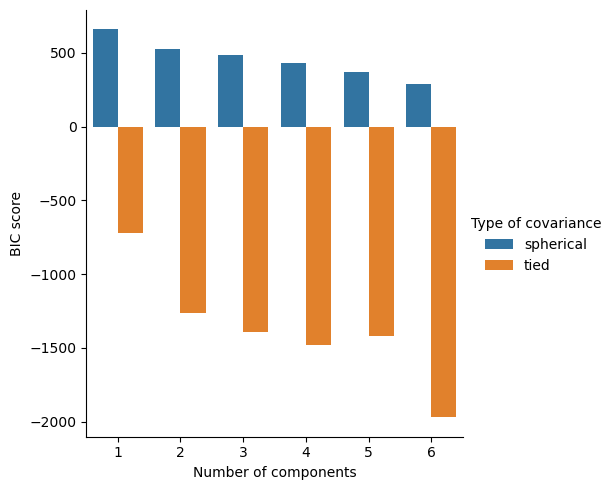

In [21]:
import seaborn as sns

sns.catplot(
    data=df2,
    kind="bar",
    x="Number of components",
    y="BIC score",
    hue="Type of covariance",
)
plt.show()